In [31]:
# SIMPLE LINEAR EGRESSION
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\SURAJ\Downloads\Hosuing_price.csv")
df = df.dropna()
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,221900.0,3,1.00,1180,5650,1.0
1,538000.0,3,2.25,2570,7242,2.0
2,180000.0,2,1.00,770,10000,1.0
3,604000.0,4,3.00,1960,5000,1.0
4,510000.0,3,2.00,1680,8080,1.0


                price  bedrooms  sqft_living  sqft_lot    floors  bathrooms
price        1.000000  0.306600     0.704709  0.139313  0.241216   0.495959
bedrooms     0.306600  1.000000     0.556587  0.067770  0.190855   0.487493
sqft_living  0.704709  0.556587     1.000000  0.213251  0.352788   0.724965
sqft_lot     0.139313  0.067770     0.213251  1.000000 -0.010395   0.139762
floors       0.241216  0.190855     0.352788 -0.010395  1.000000   0.467190
bathrooms    0.495959  0.487493     0.724965  0.139762  0.467190   1.000000


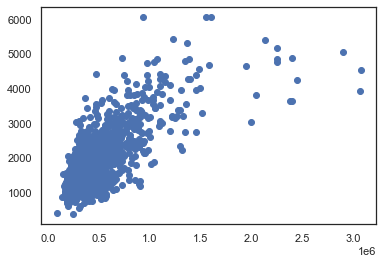

In [32]:
# linearity
new_df = df[["price", 'bedrooms', "sqft_living", "sqft_lot", "floors","bathrooms"]]
plt.scatter(new_df.price ,new_df.sqft_living)
a =print(new_df.corr())


AttributeError: Rectangle.set() got an unexpected keyword argument 'diagonal'

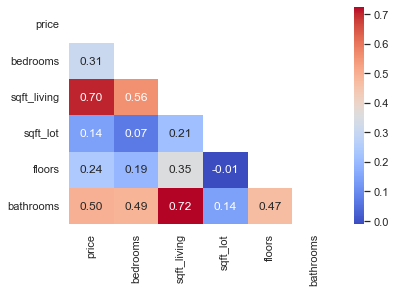

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np

# Load data into a pandas DataFrame


# Calculate the correlation matrix
corr_matrix = new_df.corr(method='pearson')

# Create the correlation matrix plot
sns.set(style="white")
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
sns.histplot(new_df, diagonal='hist', kde=False, color='gray')
plt.show()


In [72]:
from sklearn.linear_model import LinearRegression as LR
y = new_df[['price']]
x = new_df[['sqft_living']]
model = LR()
model.fit(x, y)


LinearRegression()

In [43]:
model.score(x,y)
model.intercept_
model.coef_

array([[271.71920881]])

In [36]:
y_pred= model.predict(x)
res = y- y_pred

[2.02255627]


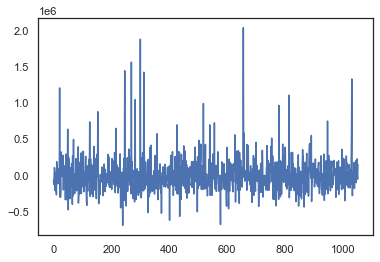

In [37]:
# AUTOOCORRRELATION
from statsmodels.stats.stattools import durbin_watson
plt.plot(res)
print(durbin_watson(res))

In [7]:
# homogeity
import numpy as np
re=np.array(res).flatten()
ype = np.array(y_pred).flatten()

import scipy.stats as stats
stats.levene(re,ype)

LeveneResult(statistic=5.320653709136387, pvalue=0.021170824462411923)

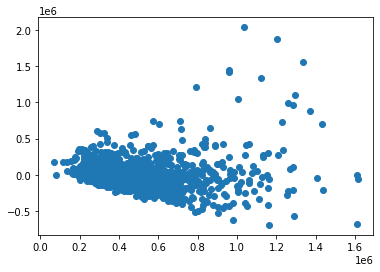

In [8]:
plt.scatter(y_pred, res)

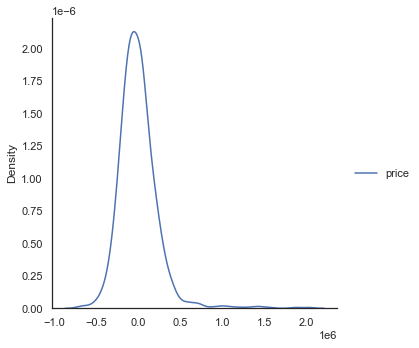

In [56]:
# error normality
sns.displot(res, kind='kde')

1.9865521634259555

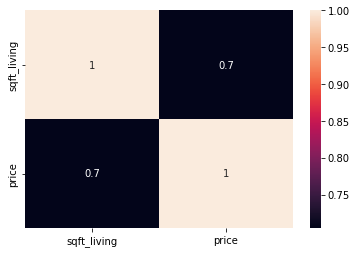

In [10]:
# multicollinearity
sns.heatmap(new_df[["sqft_living", "price"]].corr(), annot=True)

from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
VIF = 1/(1-r2)
VIF


In [50]:
import statsmodels.api as sm
x1 = new_df[['sqft_living']]
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     1037.
Date:                Tue, 09 May 2023   Prob (F-statistic):          7.78e-159
Time:                        14:45:26   Log-Likelihood:                -14543.
No. Observations:                1053   AIC:                         2.909e+04
Df Residuals:                    1051   BIC:                         2.910e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.463e+04   1.88e+04     -1.845      0.065   -7.15e+04    2194.144
sqft_living   271.7192      8.438     32.200      0.000     255.161     288.277
==============================================================================
Omnibus:                      622.151   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9616.999
Skew:                           2.406   Prob(JB):                         0.00
Kurtosis:                      17.001   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

c:\Users\SURAJ\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='sqft_living', ylabel='price'>

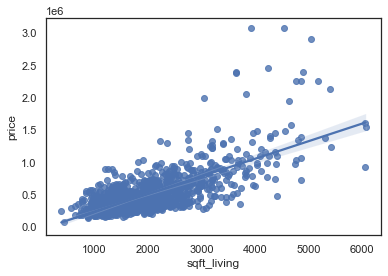

In [48]:
sns.regplot(new_df.sqft_living ,new_df.price,ci=95 )

In [53]:
results.conf_int()

,0,1
const,-71463.755348,2194.143934
sqft_living,255.161224,288.277193


In [60]:
from scipy.stats import shapiro

# assume your data is stored in a variable called "data"
stat, p_value = shapiro(res)

print("Shapiro-Wilk test statistic:", stat)
print("p-value:", p_value)

Shapiro-Wilk test statistic: 0.8456851840019226
p-value: 8.53293606211052e-31


In [77]:
import statsmodels.api as sm
import statsmodels.stats as stats
from statsmodels.formula.api import ols
model = ols("sqft_living ~ df.price", data=new_df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
df.price,1.0,4.052519e+08,4.052519e+08,1036.866324,7.781661e-159
Residual,1051.0,4.107760e+08,3.908430e+05,NaN,NaN
